In [1]:
%cd /rna/junyoung/prj/class/binfo1-work

/rna/junyoung/prj/class/binfo1-work


In [2]:
!featureCounts -a gencode.gtf -o read-counts.txt *.bam


        ==========     _____ _    _ ____  _____  ______          _____  
        =====         / ____| |  | |  _ \|  __ \|  ____|   /\   |  __ \ 
          =====      | (___ | |  | | |_) | |__) | |__     /  \  | |  | |
            ====      \___ \| |  | |  _ <|  _  /|  __|   / /\ \ | |  | |
              ====    ____) | |__| | |_) | | \ \| |____ / ____ \| |__| |
        ==========   |_____/ \____/|____/|_|  \_\______/_/    \_\_____/
	  v2.0.6

//========================== featureCounts setting ===========================\\
||                                                                            ||
||             Input files : 10 BAM files                                     ||
||                                                                            ||
||                           CLIP-35L33G.bam                                  ||
||                           CLIP-let7d.bam                                   ||
||                           CLIP-let7f-1.bam                    

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from matplotlib import pyplot as plt

cnts = pd.read_csv('read-counts.txt', sep='\t', comment='#', index_col=0)
print(len(cnts))
cnts.head()

55359


,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,CLIP-let7d.bam,CLIP-let7f-1.bam,CLIP-let7g.bam,filtered-RPF-siLuc.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam
Geneid,,,,,,,,,,,,,,,
ENSMUSG00000102693.2,chr1,3143476,3144545,+,1070,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000064842.3,chr1,3172239,3172348,+,110,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000051951.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,0,0,0,0,1,1,1,0,0
ENSMUSG00000102851.2,chr1,3322980,3323459,+,480,3,0,0,0,0,0,0,0,0,0
ENSMUSG00000103377.2,chr1,3435954,3438772,-,2819,0,0,0,0,0,0,0,0,0,0


In [3]:
readcounts = 10
cnts_sorted = cnts.loc[(cnts['RNA-control.bam'] > readcounts) &
                       (cnts['RNA-siLin28a.bam'] > readcounts) &
                       (cnts['RNA-siLuc.bam'] > readcounts)]
cnts_sorted

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,CLIP-let7d.bam,CLIP-let7f-1.bam,CLIP-let7g.bam,filtered-RPF-siLuc.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam
Geneid,,,,,,,,,,,,,,,
ENSMUSG00000102343.2,chr1;chr1;chr1;chr1;chr1,3975962;4054448;4055383;4055383;4056370,3976357;4054521;4056207;4055574;4056438,-;-;-;-;-,1364,67,0,0,0,0,31,207,157,1,2
ENSMUSG00000102269.2,chr1;chr1,4593128;4594669,4593826;4596960,+;+,2991,8,0,0,0,9,73,28,11,2,9
ENSMUSG00000098104.2,chr1,4758157,4759626,-,1470,29,0,0,0,0,63,26,15,2,7
ENSMUSG00000103922.2,chr1,4841354,4842422,+,1069,183,0,0,0,74,95,93,100,42,75
ENSMUSG00000033845.14,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4843429;4843434;4844659;4846600;4847748;484774...,4844739;4847024;4844739;4847024;4847871;484787...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,8487,4014,0,0,0,3,1355,3022,2563,1859,3191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000064367.1,chrM,11742,13565,+,1824,3665,0,0,0,4764,5281,15549,17408,5986,5305
ENSMUSG00000064368.1,chrM,13552,14070,-,519,1666,0,0,0,27,1976,6741,8052,11471,10842
ENSMUSG00000064369.1,chrM,14071,14139,-,69,81,0,0,0,2,61,30,25,18,19


In [4]:
total_counts = cnts_sorted.iloc[:,5:15]

In [5]:
rpm = total_counts.divide(total_counts.sum(axis=0)) * 1e6
rpkm = rpm.divide(cnts_sorted['Length'] / 1e3, axis=0)
tpm = rpkm.divide(rpkm.sum(axis=0) / 1e6, axis=1)
l2rpm = np.log2(rpm + 1)
l2tpm = np.log2(tpm + 1)

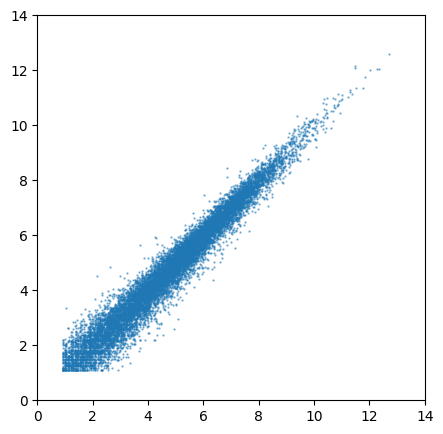

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scatter(l2rpm['RNA-siLin28a.bam'],l2rpm['RNA-siLuc.bam'], alpha = 0.5, s= 0.5)
ax.set_xlim(0,14)
ax.set_ylim(0,14)
None

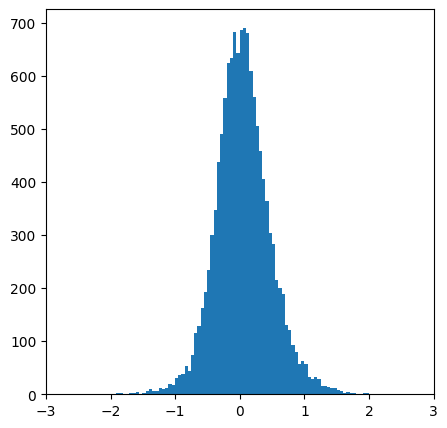

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.hist(l2tpm['RNA-siLin28a.bam'] - l2tpm['RNA-siLuc.bam'], bins= 100)
ax.set_xticks([-3, -2, -1, 0, 1, 2, 3])
None

In [43]:
gene_list = cnts_sorted.index.str.split('.').str[0].copy()
gene_list = gene_list.tolist()
gene_list


['ENSMUSG00000102343',
 'ENSMUSG00000102269',
 'ENSMUSG00000098104',
 'ENSMUSG00000103922',
 'ENSMUSG00000033845',
 'ENSMUSG00000102275',
 'ENSMUSG00000025903',
 'ENSMUSG00000033813',
 'ENSMUSG00000033793',
 'ENSMUSG00000104046',
 'ENSMUSG00000025907',
 'ENSMUSG00000051285',
 'ENSMUSG00000098201',
 'ENSMUSG00000103509',
 'ENSMUSG00000048538',
 'ENSMUSG00000097797',
 'ENSMUSG00000103067',
 'ENSMUSG00000103933',
 'ENSMUSG00000061024',
 'ENSMUSG00000025911',
 'ENSMUSG00000025912',
 'ENSMUSG00000045210',
 'ENSMUSG00000025915',
 'ENSMUSG00000046101',
 'ENSMUSG00000098234',
 'ENSMUSG00000093178',
 'ENSMUSG00000099032',
 'ENSMUSG00000025917',
 'ENSMUSG00000056763',
 'ENSMUSG00000067851',
 'ENSMUSG00000100648',
 'ENSMUSG00000048960',
 'ENSMUSG00000057715',
 'ENSMUSG00000097628',
 'ENSMUSG00000016918',
 'ENSMUSG00000025938',
 'ENSMUSG00000042414',
 'ENSMUSG00000005886',
 'ENSMUSG00000103085',
 'ENSMUSG00000102664',
 'ENSMUSG00000025935',
 'ENSMUSG00000025937',
 'ENSMUSG00000102982',
 'ENSMUSG00

In [19]:
pip install gprofiler-official

  Obtaining dependency information for gprofiler-official from https://files.pythonhosted.org/packages/df/1b/5a87c1a1da8f601c00a0ce4dedb5aab8a5cad6a0f4a5062c4da22a045072/gprofiler_official-1.0.0-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


In [22]:
from gprofiler import GProfiler
gp = GProfiler(return_dataframe=True)

In [46]:
result = gp.profile(organism='mmusculus', query=gene_list, sources=["GO:BP", "GO:MF", "GO:CC"])

In [47]:
result

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents
0,GO:CC,GO:0005829,cytosol,4.940656e-324,True,"""The part of the cytoplasm that does not conta...",4105,11240,3134,26995,0.278826,0.763459,query_1,"[GO:0005737, GO:0110165]"
1,GO:BP,GO:0019222,regulation of metabolic process,4.940656e-324,True,"""Any process that modulates the frequency, rat...",6882,11183,4226,26944,0.377895,0.614066,query_1,"[GO:0008152, GO:0050789]"
2,GO:CC,GO:0043226,organelle,4.940656e-324,True,"""Organized structure of distinctive morphology...",16169,11240,9038,26995,0.804093,0.558971,query_1,[GO:0110165]
3,GO:MF,GO:0043167,ion binding,4.940656e-324,True,"""Binding to an ion, a charged atoms or groups ...",6018,11172,4021,25063,0.359918,0.668162,query_1,[GO:0036094]
4,GO:CC,GO:0043227,membrane-bounded organelle,4.940656e-324,True,"""Organized structure of distinctive morphology...",14934,11240,8434,26995,0.750356,0.564752,query_1,[GO:0043226]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3192,GO:CC,GO:0000439,transcription factor TFIIH core complex,4.976053e-02,True,"""The 7 subunit core of TFIIH that is a part of...",10,11240,10,26995,0.000890,1.000000,query_1,[GO:0090575]
3193,GO:CC,GO:0032797,SMN complex,4.976053e-02,True,"""A protein complex that contains the survival ...",10,11240,10,26995,0.000890,1.000000,query_1,"[GO:0034719, GO:0120114]"
3194,GO:CC,GO:0030681,multimeric ribonuclease P complex,4.976053e-02,True,"""A ribonuclease P complex that generally conta...",10,11240,10,26995,0.000890,1.000000,query_1,[GO:0030677]
3195,GO:CC,GO:0031932,TORC2 complex,4.976053e-02,True,"""A protein complex that contains at least TOR ...",10,11240,10,26995,0.000890,1.000000,query_1,[GO:0038201]


In [ ]:
plt.style.use('ggplot')
fig, ax = plt.subplots(1, 1, figsize=(3, 3))
ax.scatter(np.log2(cnts_sorted['clip_enrichment']),
           np.log2(cnts_sorted['rden_change']), alpha = 0.5, color='black', s=0.1)
ax.set_xlabel(r'LIN28A CLIP enrichment ($\log_2$)')
ax.set_ylabel('Ribosome density change\n'+ r'upon Lin28a knockdown ($\log_2$)')
ax.set_title('CLIP and ribosome footprinting\nupon Lin28a knockdown', fontsize = 12)
corr = stats.pearsonr(cnts_sorted['clip_enrichment'],cnts_sorted['rden_change'])
ax.annotate(f'r = {corr[0]:.4f}', xy=(0.95, 0.05), xycoords='axes fraction', ha='right')
ax.set_ylim(-2,2)
ax.set_xlim(-6,4)
ax.set_yticks([-2,-1,.0,1,2])
None

In [ ]:
cnts_merge = pd.merge(cnts_sorted, mouselocal)
print(len(cnts_merge))
cnts_merge.head()

In [ ]:
plt.style.use('ggplot')
fig, ax = plt.subplots(1, 1, figsize=(3, 3))

groups = cnts_merge.groupby('type')
for name, group in groups:
    ax.plot(np.log2(group.clip_enrichment),
            np.log2(group.rden_change),
            marker='.',
            linestyle='',
            label=name,
            alpha=0.3,
            markersize=1
            )
ax.legend(fontsize='8', loc='upper left',markerscale=10)
ax.set_xlabel(r'LIN28A CLIP enrichment ($\log_2$)')
ax.set_ylabel('Ribosome density change\n'+ r'upon Lin28a knockdown ($\log_2$)')
ax.set_ylim(-2,3)
ax.set_xlim(-6,4)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)
None